# SOIL TYPE CLASSIFICATION

In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from skimage import io, transform
from sklearn import preprocessing
import numpy as np
import joblib
import cv2

In [2]:
path = r"Dataset"
model_folder = "model"
categories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
categories


['Black Soil', 'Laterite Soil']

In [3]:
X_file = os.path.join(model_folder, "X.txt.npy")
Y_file = os.path.join(model_folder, "Y.txt.npy")
if os.path.exists(X_file) and os.path.exists(Y_file):
    X = np.load(X_file)
    Y = np.load(Y_file)
    print("X and Y arrays loaded successfully.")
else:
    X = [] # input array
    Y = [] # output array
    for root, dirs, directory in os.walk(path):
        for j in range(len(directory)):
            name = os.path.basename(root)
            print(f'Loading category: {dirs}')
            print(name+" "+root+"/"+directory[j])
            if 'Thumbs.db' not in directory[j]:
                img_array = cv2.imread(root+"/"+directory[j])
                img_resized = resize(img_array, (64, 64, 3))
                # Append the input image array to X
                X.append(img_resized.flatten())
                # Append the index of the category in categories list to Y
                Y.append(categories.index(name))
    X = np.array(X)
    Y = np.array(Y)
    np.save(X_file, X)
    np.save(Y_file, Y)

Loading category: []
Black Soil Dataset\Black Soil/10.jpg
Loading category: []
Black Soil Dataset\Black Soil/11.jpg
Loading category: []
Black Soil Dataset\Black Soil/12.jpg
Loading category: []
Black Soil Dataset\Black Soil/13.jpg
Loading category: []
Black Soil Dataset\Black Soil/14.jpg
Loading category: []
Black Soil Dataset\Black Soil/15.jpg
Loading category: []
Black Soil Dataset\Black Soil/16.jpg
Loading category: []
Black Soil Dataset\Black Soil/17.jpg
Loading category: []
Black Soil Dataset\Black Soil/18.jpg
Loading category: []
Black Soil Dataset\Black Soil/19.jpg
Loading category: []
Black Soil Dataset\Black Soil/2.jpg
Loading category: []
Black Soil Dataset\Black Soil/20.jpg
Loading category: []
Black Soil Dataset\Black Soil/21.jpg
Loading category: []
Black Soil Dataset\Black Soil/22.jpg
Loading category: []
Black Soil Dataset\Black Soil/23.jpg
Loading category: []
Black Soil Dataset\Black Soil/24.jpg
Loading category: []
Black Soil Dataset\Black Soil/25.jpg
Loading categor

Loading category: []
Black Soil Dataset\Black Soil/aug_0_1410.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_1420.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_1427.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_1428.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_1429.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_1433.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_1437.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_144.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_1448.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_145.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_1451.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_1458.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_1464.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_1466.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_1474.jp

Loading category: []
Black Soil Dataset\Black Soil/aug_0_2018.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2022.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2023.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2029.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2030.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2050.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2052.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2058.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_206.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2065.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2066.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2067.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2070.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2072.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2074.j

Loading category: []
Black Soil Dataset\Black Soil/aug_0_2723.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2728.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2732.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2744.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2753.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2754.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2759.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2767.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2774.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2776.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2799.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_282.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2824.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2827.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_2829.j

Loading category: []
Black Soil Dataset\Black Soil/aug_0_3390.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3395.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3397.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3399.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3401.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3407.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3411.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3416.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3418.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3419.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3426.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3430.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3431.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3432.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3435.

Loading category: []
Black Soil Dataset\Black Soil/aug_0_3848.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3850.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3854.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3855.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3858.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3871.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3878.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_388.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3881.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3883.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3885.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3890.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3896.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3901.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_3902.j

Loading category: []
Black Soil Dataset\Black Soil/aug_0_4438.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_4439.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_4441.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_4447.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_4450.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_4452.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_4454.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_446.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_4463.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_4475.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_4476.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_4478.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_448.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_4484.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_4491.jp

Loading category: []
Black Soil Dataset\Black Soil/aug_0_5003.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5010.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5013.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5017.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5021.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5026.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5031.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5032.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5040.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5041.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5044.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5048.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_505.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5052.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5061.j

Loading category: []
Black Soil Dataset\Black Soil/aug_0_5575.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5579.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5586.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5591.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5594.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5599.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5605.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5609.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5613.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5617.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5621.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5622.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5626.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5629.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_5632.

Loading category: []
Black Soil Dataset\Black Soil/aug_0_621.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6212.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6213.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6214.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6221.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6222.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6223.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6224.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6227.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6233.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6234.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6239.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6240.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6247.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6250.j

Loading category: []
Black Soil Dataset\Black Soil/aug_0_6785.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6788.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6789.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6792.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6797.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6798.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_68.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6801.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6804.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_681.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6810.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6812.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6817.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6820.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_6826.jpe

Loading category: []
Black Soil Dataset\Black Soil/aug_0_7378.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_7381.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_7382.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_7400.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_7409.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_7417.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_7424.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_7443.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_745.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_7455.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_7458.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_746.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_7460.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_7465.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_7481.jp

Loading category: []
Black Soil Dataset\Black Soil/aug_0_8074.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8085.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8097.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8099.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8101.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8114.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8117.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_813.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8141.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8142.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8143.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8144.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8150.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8156.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8157.j

Loading category: []
Black Soil Dataset\Black Soil/aug_0_872.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8720.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8728.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_873.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8731.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8734.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8735.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8750.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8753.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8754.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8756.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_877.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8771.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8773.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_8775.jpe

Loading category: []
Black Soil Dataset\Black Soil/aug_0_9334.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9336.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9340.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9341.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9346.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9347.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9348.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9354.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9357.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9359.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9362.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9366.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9367.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9369.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9370.

Loading category: []
Black Soil Dataset\Black Soil/aug_0_9850.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9855.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9856.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9858.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9861.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9864.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9867.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9877.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_988.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9884.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9886.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9889.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_989.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9890.jpeg
Loading category: []
Black Soil Dataset\Black Soil/aug_0_9892.jp

Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_1486.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_1490.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_1509.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_1513.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_1516.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_1518.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_1519.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_152.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_1534.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_1544.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_1556.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_1563.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_1576.jpeg
Loading category: []
Laterite Soil Dataset\Laterite 

Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_2534.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_2536.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_2541.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_2548.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_2557.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_2560.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_2569.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_2581.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_2591.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_26.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_2603.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_261.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_2611.jpeg
Loading category: []
Laterite Soil Dataset\Laterite So

Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_3555.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_3556.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_3564.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_3568.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_3587.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_36.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_361.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_3610.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_3613.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_3642.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_3646.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_3653.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_3654.jpeg
Loading category: []
Laterite Soil Dataset\Laterite So

Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_4643.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_4656.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_4663.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_4664.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_4678.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_4680.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_4681.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_4685.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_4701.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_4710.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_4719.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_4752.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_4754.jpeg
Loading category: []
Laterite Soil Dataset\Laterite

Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_5873.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_5877.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_5881.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_5883.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_5897.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_5899.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_5907.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_5946.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_5948.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_5949.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_5951.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_5960.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_5967.jpeg
Loading category: []
Laterite Soil Dataset\Laterite

Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_698.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_6990.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_6996.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_7007.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_7008.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_7009.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_7023.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_7024.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_7027.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_7029.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_7032.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_7034.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_7037.jpeg
Loading category: []
Laterite Soil Dataset\Laterite 

Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_81.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_810.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_8100.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_8107.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_8109.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_8110.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_8112.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_8113.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_8114.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_8126.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_8127.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_8141.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_8155.jpeg
Loading category: []
Laterite Soil Dataset\Laterite So

Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_9210.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_9217.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_9227.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_9229.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_923.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_9246.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_925.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_9255.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_9262.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_9286.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_9315.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_9318.jpeg
Loading category: []
Laterite Soil Dataset\Laterite Soil/aug_0_9325.jpeg
Loading category: []
Laterite Soil Dataset\Laterite S

In [4]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=77)

In [5]:
labels=categories

In [6]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [7]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# Support Vector Machine Classifier


Model saved successfully.
Support Vector Machineclassifier Accuracy    : 100.0
Support Vector Machineclassifier Precision   : 100.0
Support Vector Machineclassifier Recall      : 100.0
Support Vector Machineclassifier FSCORE      : 100.0

 Support Vector Machineclassifier classification report
                precision    recall  f1-score   support

   Black Soil       1.00      1.00      1.00       637
Laterite Soil       1.00      1.00      1.00       289

     accuracy                           1.00       926
    macro avg       1.00      1.00      1.00       926
 weighted avg       1.00      1.00      1.00       926



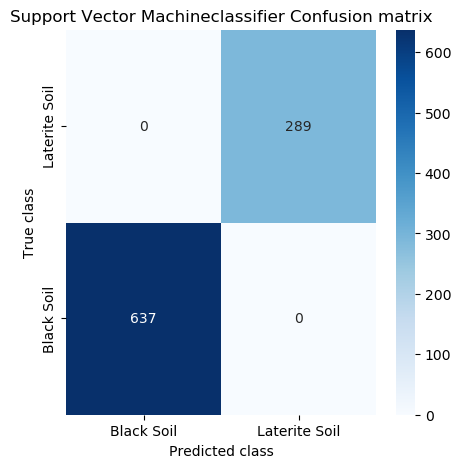

In [9]:
if os.path.exists('SVM_model.pkl'):
    # Load the trained model from the file
    clf = joblib.load('SVM_model.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(x_test)
    calculateMetrics("Support Vector Machine Classifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    clf =SVC(kernel='poly', C=1.0, gamma='scale', random_state=42,)
    clf.fit(x_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'SVM_model.pkl')
    print("Model saved successfully.")
    predict = clf.predict(x_test)
    calculateMetrics("Support Vector Machineclassifier", predict, y_test)

# RandomForestClassifier

Random Forest model trained and model weights saved.
RandomForestClassifier Accuracy    : 99.89200863930886
RandomForestClassifier Precision   : 99.82758620689656
RandomForestClassifier Recall      : 99.9215070643642
RandomForestClassifier FSCORE      : 99.87436691644042

 RandomForestClassifier classification report
                precision    recall  f1-score   support

   Black Soil       1.00      1.00      1.00       636
Laterite Soil       1.00      1.00      1.00       290

     accuracy                           1.00       926
    macro avg       1.00      1.00      1.00       926
 weighted avg       1.00      1.00      1.00       926



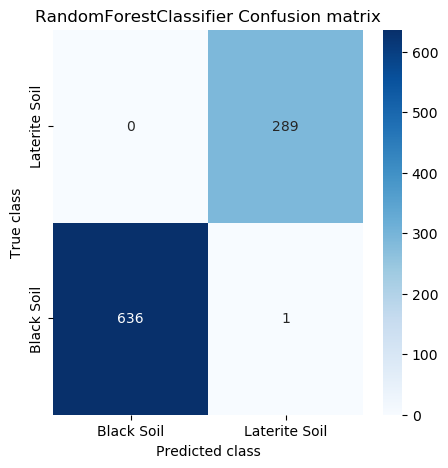

In [10]:
# Check if the pkl file exists
Model_file = os.path.join(model_folder, "RFC_Model.pkl")
if os.path.exists(Model_file):
    # Load the model from the pkl file
    rf_classifier = joblib.load(Model_file)
    predict = rf_classifier.predict(x_test)
    calculateMetrics("RandomForestClassifier", predict, y_test)
else:
    
    # Create Random Forest Classifier with Decision Tree as base estimator
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(x_train, y_train)
    # Save the model weights to a pkl file
    joblib.dump(rf_classifier, Model_file)  
    predict = rf_classifier.predict(x_test)
    print("Random Forest model trained and model weights saved.")
    calculateMetrics("RandomForestClassifier", predict, y_test)
    

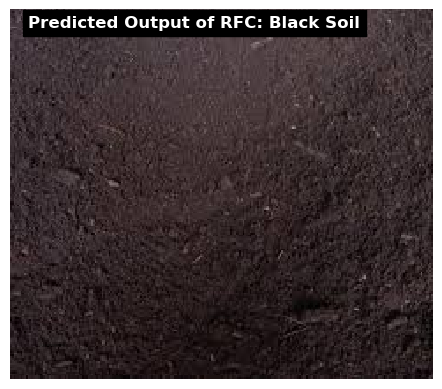

In [17]:
path=r"Testimages/21.jpg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=rf_classifier.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output of RFC: {output_name}', color='white', fontsize=12, weight='bold', backgroundcolor='black')
plt.axis('off')
plt.show()

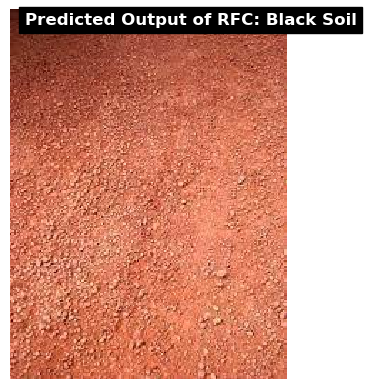

In [18]:
path=r"Testimages/1.jpg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=rf_classifier.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output of RFC: {output_name}', color='white', fontsize=12, weight='bold', backgroundcolor='black')
plt.axis('off')
plt.show()

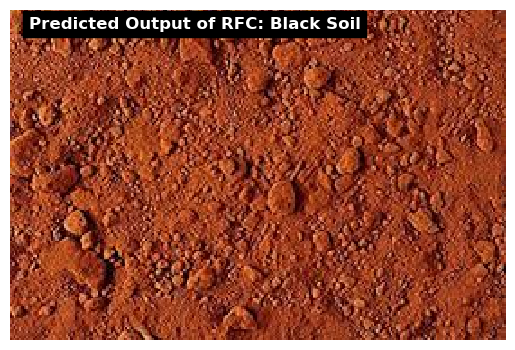

In [19]:
path=r"Testimages/14.jpg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=rf_classifier.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output of RFC: {output_name}', color='white', fontsize=12, weight='bold', backgroundcolor='black')
plt.axis('off')
plt.show()

In [ ]:
path=r"Testimages/aug_0_5359.jpeg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=clf.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output of RFC: {output_name}', color='white', fontsize=12, weight='bold', backgroundcolor='black')
plt.axis('off')
plt.show()

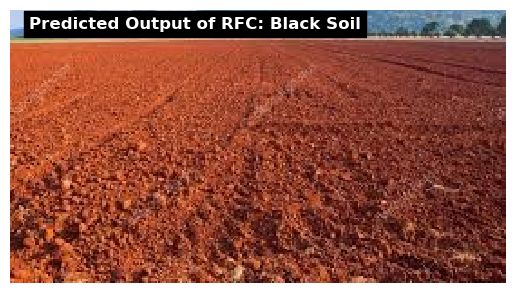

In [16]:
path=r"Testimages/10.jpg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=clf.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output of RFC: {output_name}', color='white', fontsize=12, weight='bold', backgroundcolor='black')
plt.axis('off')
plt.show()

In [ ]:
path=r"Testimages/21.jpeg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=clf.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output of RFC: {output_name}', color='white', fontsize=12, weight='bold', backgroundcolor='black')
plt.axis('off')
plt.show()